# Sentence Piece Tokenizer from scratch

We re-build the sentence piece tokenizer in watered down python version, to illustrate how it works.

Sine we aren't trying to reinvent the wheel, the layout is a bit clunky. SentencePiece relies on an auxiliary tokenizer to first find the possible tokens. For this, we use byte pair encoding. A bare-bones implemention is in the byte_pair_encoder.py module. We only fill out the class enough to 

a) determine the set of irreducible characters in the document 

b) discover the byte pairs and 

c) get their initial document counts

We then feed the irreducible characters and tokens as well as the original text into SentencePiece, and train it. The clunkiness arises from sync'ing up text cleaning. We have to make sure to use the same symbol "\_" everywhere for spaces, and be sure to remove newlines and any extra spaces.

In [63]:
import re
import numpy as np
from byte_pair_encoder import BytePairEncoder
from sentence_piece import SentencePieceTrainer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load in the sample text file

The text is a short story by Isaac Asimov, called "good taste."

In [64]:
def load_text():
    with open('good_taste.txt', 'r') as file:
        text = file.read()
        text = text.replace('\n', ' ')
        text = re.sub(' +', ' ', text)
    return text

### Create the tokens using the Bytepair encoder

In [65]:
bpe = BytePairEncoder()
spm = SentencePieceTrainer()

In [68]:
text = load_text()

num_merges = 100

print("Fitting the byte pair encoder")
bpe.fit(text, num_merges)

tokens = bpe.tokens
tokens['_'] = tokens[' ']
tokens.pop(' ')

characters = bpe.characters
characters.discard(' ')
characters.add('_')
print("Finished.")

spm.fit(text=text, tokens=tokens, characters=characters, vocab_size=100)

Fitting the byte pair encoder
Finished.
--- Round 1. Vocab size: 169 ---
EM iter 0: Loss=-96804.04
EM iter 1: Loss=-96575.67
EM iter 2: Loss=-96553.68
EM iter 3: Loss=-96553.54
EM iter 4: Loss=-96553.54
--- Round 2. Vocab size: 136 ---
EM iter 0: Loss=-100128.96
EM iter 1: Loss=-100124.61
EM iter 2: Loss=-100123.01
EM iter 3: Loss=-100123.01
--- Round 3. Vocab size: 109 ---
EM iter 0: Loss=-104923.25
EM iter 1: Loss=-104923.22
EM iter 2: Loss=-104923.22


## Show how we can get sample tokenizations

The nbest_size parameter finds the nbest_size most probable tokenizations. It then samples from them uniformly to supply the tokenization.

By setting nbest_size=1 (the default) we get a deterministic tokenization, given by the most probable sequence.

In [69]:
nbest_size = 3
string = 'hello world'
for i in range(3):
    x = spm.tokenize('hello world', nbest_size=nbest_size)
    print(f"Sample {i+1}: {x}")

Sample 1: ['h', 'e', 'l', 'l', 'o', '_', 'w', 'or', 'l', 'd']
Sample 2: ['h', 'e', 'l', 'l', 'o', '_', 'w', 'o', 'r', 'l', 'd']
Sample 3: ['h', 'e', 'l', 'l', 'o', '_', 'w', 'or', 'l', 'd']


No matter which tokenization we use, recovering the original string is really easy. We just join the array and replace the space token "\_" with an actual space

In [71]:
print("Original string:", string)
x = spm.tokenize('hello world', nbest_size=nbest_size)
print("Reconstructed string:", ''.join(x).replace('_', ' '))

Original string: hello world
Reconstructed string: hello world


In [148]:
from scipy.special import digamma

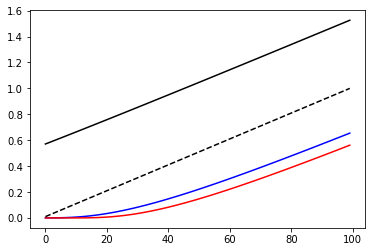

In [163]:
import matplotlib.pyplot as plt
plt.plot(np.exp(digamma(1+np.linspace(0.01,1.,100))), 'k-')
plt.plot(np.exp(digamma(0.1+np.linspace(0.01,1.,100))), 'b-')
plt.plot(np.exp(digamma(0.0+np.linspace(0.01,1.,100))), 'r-')
plt.plot(np.linspace(0.01,1.,100), 'k--')